In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/data-science-bowl-2019/train.csv
/kaggle/input/data-science-bowl-2019/specs.csv
/kaggle/input/data-science-bowl-2019/sample_submission.csv
/kaggle/input/data-science-bowl-2019/train_labels.csv
/kaggle/input/data-science-bowl-2019/test.csv
/kaggle/input/temp-ds-bowl-2019/labels_created
/kaggle/input/temp-ds-bowl-2019/df_counter_ini
/kaggle/input/temp-ds-bowl-2019/all_users.pkl


In [2]:
import IPython

def display(*dfs):
    for df in dfs:
        IPython.display.display(df)
        
## Function to reduce the DF size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
%time df = pd.read_csv('/kaggle/input/data-science-bowl-2019/train.csv', engine='c')
# labels = pd.read_csv('/kaggle/input/data-science-bowl-2019/train_labels.csv')
df_test = pd.read_csv('/kaggle/input/data-science-bowl-2019/test.csv')
specs = pd.read_csv('/kaggle/input/data-science-bowl-2019/specs.csv')

df = reduce_mem_usage(df)
# labels = reduce_mem_usage(labels)
df_test = reduce_mem_usage(df_test)
specs = reduce_mem_usage(specs)

CPU times: user 1min 6s, sys: 10.7 s, total: 1min 17s
Wall time: 1min 17s
Mem. usage decreased to 778.73 Mb (18.2% reduction)
Mem. usage decreased to 79.40 Mb (18.2% reduction)
Mem. usage decreased to  0.01 Mb (0.0% reduction)


In [4]:
df_counter = pd.read_feather('/kaggle/input/temp-ds-bowl-2019/df_counter_ini')
#df_counter = pd.read_feather('/kaggle/input/temp-ds-bowl-2019/df_counter')
labels = pd.read_feather('/kaggle/input/temp-ds-bowl-2019/labels_created')


/opt/conda/lib/python3.6/site-packages/pandas/io/feather_format.py:117: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_feather(path, columns=columns, nthreads=int_use_threads)
/opt/conda/lib/python3.6/site-packages/pyarrow/pandas_compat.py:751: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [5]:
# all_users = pd.read_pickle('/kaggle/input/temp-ds-bowl-2019/all_users.pkl')
# all_users.installation_id.unique().shape, labels.installation_id.unique().shape

In [6]:
import gc
gc.collect()

22

# Part I - Create all_users
## One user

In [7]:
#user_id, user = next(iter(df.groupby('installation_id')))
user_id = 'daed707d' #'ea49ea9c'#'29d1aaee' # '3f0dca37'
user = df[df.installation_id == user_id].copy()

totall_attempts = labels[labels.installation_id == user_id].total_attempts.sum()
print(totall_attempts)

totall_assessments  = labels[labels.installation_id == user_id].shape[0]
totall_assessments

6


4

In [8]:
labels[labels.installation_id == user_id]

,game_session,world,type,timestamp,num_correct,total_attempts,installation_id,title,accuracy,num_incorrect,accuracy_group
7,002396a496a0c1c7,TREETOPCITY,Assessment,2019-10-07 18:18:32.994000+00:00,1,1,daed707d,Bird Measurer (Assessment),1.0,0,3
3730,3679af0d3808b48d,TREETOPCITY,Assessment,2019-10-07 18:16:42.566000+00:00,1,2,daed707d,Mushroom Sorter (Assessment),0.5,1,2
15382,df022b1f69273a17,CRYSTALCAVES,Assessment,2019-10-08 16:33:19.865000+00:00,1,1,daed707d,Cart Balancer (Assessment),1.0,0,3
15977,e74cc2056b3aee87,CRYSTALCAVES,Assessment,2019-10-10 19:18:04.921000+00:00,1,2,daed707d,Cart Balancer (Assessment),0.5,1,2


In [9]:
user['timestamp'] = pd.to_datetime(user['timestamp'])
print(user.shape)
user.sort_values(by='timestamp').head()

user['attempt'] = ((user.type == 'Assessment') &
                       (((user.event_code == 4100) & (user.title != 'Bird Measurer (Assessment)')) |
                        ((user.event_code == 4110)&(user.title == 'Bird Measurer (Assessment)')) )
                   ).astype('int8')
#attempt_idx = user[user.attempt == 1].index
assert user.attempt.sum() == totall_attempts

user['correct'] = 0
user.loc[user.attempt == 1, 'correct'] = user[user.attempt == 1].event_data.str.contains('"correct":true').astype('int8')
#user

(1650, 11)


In [10]:
def get_common_data(session, user_data, user_temp, user_results, test=False):
    """
    params: 
        session: DataFrame - one session form groupby('game_session')
        user_data: dict - dict with data info about user. Accumulate all infor for user though attempts.
    return:
        user_results: list - list of dictionaries, one for each attempt of one user
    """
#     display(session)
    
    data_type = session.type.iloc[0]
    world = session.world.iloc[0]
    template = world +'_'+ data_type
    user_temp[template+'_unique'] = user_temp.get(template+'_unique', [])
    user_data['total_' + data_type+'_unique'] = user_data.get('total_' + data_type+'_unique', [])
    
    if data_type == 'Assessment' and (session.attempt.sum() >= 1 or test):  
        attempt = user_data.copy()
        #print(attempt)
        
        attempt['curr_attempt_world'] = world
        attempt['curr_attempt_title'] = session.title.iloc[0]
        attempt['curr_attempt_start_time'] = session.timestamp.iloc[0]
        attempt['curr_attempt_duration'] = attempt['time_start'] - attempt['curr_attempt_start_time']
        
        # to labels
        attempt['n_correct'] = session.correct.sum()
        attempt['n_incorrect'] = session.attempt.sum() - attempt['n_correct']
        
        # TOTAL info
        for t in ['Clip', 'Game', 'Activity', 'Assessment']:
            attempt['total_' + t +'_unique'] = len(set(attempt['total_' + t +'_unique'])) \
                                                    if isinstance(attempt['total_' + t +'_unique'], list) \
                                                    and len(attempt['total_' + t +'_unique']) >0 else 0
        
        
        # current WORLD - write all previous info in current world
        features = [x for x in user_temp.keys() if world in str(x)]
        temp = defaultdict(int)
#         print('temp2', user_temp)
        temp.update({k.replace(world, 'world'):user_temp[k] for k in features})
#         print('world', temp)
        f = [x.replace(world, 'world') for x in features if 'unique' in x]
        assert len(f) <= 4
        temp.update({k: len(set(temp[k])) for k in f})
        temp['world_accuracy'] = temp['world_n_correct']/ (temp['world_n_correct']+temp['world_n_incorrect'])\
                                 if temp['world_n_correct']+temp['world_n_incorrect']!=  0 else -1
        f = [x for x in features if 'game_time' in x]
        temp['world_total_game_time'] = np.sum([user_temp[x] for x in f])
        f = [x for x in features if 'event_count' in x]
        temp['world_total_event_count'] = np.sum([user_temp[x] for x in f])
        f = [x for x in features if 'n_game_session' in x]
        temp['world_total_game_session'] = np.sum([user_temp[x] for x in f])
        attempt.update(temp)
        
        # current TITLE - write all previous info in attempts with the same title
        title = session.title.iloc[0]
        features = [x for x in user_temp.keys() if title in str(x)]
        temp = {k.replace(title, 'title'):user_temp[k] for k in features}
        attempt.update(temp)
        
        user_results.append(attempt)
        
        #  ======= Save infro for future attempt ======        
        # current title - CALCULATE (accumulate) all previous info in attempts with the same title
        user_temp[title + '_n_assessments'] += 1
        user_temp[title + '_n_attempts'] += session.attempt.sum()
        user_temp[title + '_n_correct'] += session.correct.sum()
        user_temp[title + '_n_incorrect'] = user_temp[title + '_n_attempts'] - user_temp[title + '_n_correct']
        user_temp[title + '_n_unfinished'] += 0  if session.attempt.sum() > 0 else 1
        user_temp[title + '_accuracy'] = user_temp[title + '_n_correct'] / user_temp[title + '_n_attempts']
        
        user_temp[title + '_event_count'] += session.shape[0]
        user_temp[title + '_game_time'] += session.game_time.max()
        
        # Currect attempts - to future
        user_temp[world+'_n_correct'] += attempt['n_correct'] 
        user_temp[world+'_n_incorrect'] += attempt['n_incorrect']
        user_data['total_n_correct'] += attempt['n_correct'] 
        user_data['total_n_incorrect'] += attempt['n_incorrect'] 
        
    event_code_counts = session['event_code'].value_counts()
    for i, j in zip(event_code_counts.index, event_code_counts.values):
        user_data[i] = user_data.get(i,0) + j
        
    # add common info, include attempt info for next study
    user_temp[template+'_unique'].append(session.title.iloc[0])
    user_temp[template+'_n_game_session'] += 1
    user_temp[template+'_event_count'] += session.shape[0]
    
    template_total = 'total_' + data_type
    user_data[template_total+'_unique'].append(session.title.iloc[0])
    user_data[template_total+'_n_game_session'] += 1
    user_data[template_total+'_event_count'] += session.shape[0]
    
    if data_type != 'Clip':
        user_temp[template+'_game_time'] += session.game_time.max()
        user_data[template_total+'_game_time'] += session.game_time.max()
        user_data['total_game_time'] += session.game_time.max()
        
    user_data['total_' + data_type] += 1
    user_data['total_n_game_session'] += 1
    user_data['total_event_count'] += session.shape[0]
    
        
        
    return user_results


In [11]:
%%time 
user_results = []

from collections import defaultdict
user_data, user_temp = defaultdict(int), defaultdict(int)
user_data['installation_id'] = user.installation_id.iloc[0]
user_data['time_start'] = user.timestamp.iloc[0]

for i, session in user.groupby('game_session', sort=False):
    #print(user_data)
    get_common_data(session, user_data, user_temp, user_results)
    
tt = pd.DataFrame(user_results)

CPU times: user 104 ms, sys: 0 ns, total: 104 ms
Wall time: 103 ms


In [12]:
tt

,installation_id,time_start,total_Clip_unique,2000,total_Clip_n_game_session,total_Clip_event_count,total_Clip,total_n_game_session,total_event_count,total_Activity_unique,...,5000,4031,title_n_assessments,title_n_attempts,title_n_correct,title_n_incorrect,title_n_unfinished,title_accuracy,title_event_count,title_game_time
0,daed707d,2019-10-04 16:37:00.854000+00:00,4,6,4,4,4,6,210,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,daed707d,2019-10-04 16:37:00.854000+00:00,5,8,5,5,5,8,255,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,daed707d,2019-10-04 16:37:00.854000+00:00,7,14,8,8,8,14,486,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,daed707d,2019-10-04 16:37:00.854000+00:00,10,34,18,18,18,34,1590,6,...,13.0,13.0,1.0,1.0,1.0,0.0,0.0,1.0,14.0,15811.0


## Total: for all users

### Info for last attemp

In [13]:
def create_all_users(df, test=False):
    global labels
    all_users = pd.DataFrame()
    
    if test: labels = df  # all unique users with attemptions; for test - all users
    for n,user_id in enumerate(labels.installation_id.unique()):
        # print(n, user_id)
        user = df[df.installation_id == user_id].copy()
        user['timestamp'] = pd.to_datetime(user['timestamp'])
        user.sort_values(by='timestamp', inplace=True)

        user['attempt'] = ((user.type == 'Assessment') &
                           (((user.event_code == 4100) & (user.title != 'Bird Measurer (Assessment)')) |
                            ((user.event_code == 4110)&(user.title == 'Bird Measurer (Assessment)')) )
                       ).astype('int8')

        user['correct'] = 0
        user.loc[user.attempt == 1, 'correct'] = user[user.attempt == 1]\
                                                .event_data.str.contains('"correct":true').astype('int8')

        user_results = []

        user_data, user_temp = defaultdict(int), defaultdict(int)
        user_data['installation_id'] = user.installation_id.iloc[0]
        user_data['time_start'] = user.timestamp.iloc[0]
        
        for i, session in user.groupby('game_session', sort=False):
            get_common_data(session, user_data, user_temp, user_results, test=test)

        temp = all_users.shape
        all_users = pd.concat((all_users,pd.DataFrame(user_results)), ignore_index=True, sort=False)
        
        assert all_users.shape > temp, user_id
#         display(all_users)
#         input()
    
    return all_users

In [14]:
all_users = create_all_users(df)

In [15]:
print(all_users.shape, all_users.installation_id.unique().shape)
all_users.columns = all_users.columns.astype(str)
all_users.to_pickle('all_users.pkl')

(17690, 103) (3614,)


# Creating test data

In [16]:
labels.installation_id.unique().shape, df_test.installation_id.unique().shape

((3614,), (1000,))

In [17]:
test_all_users = create_all_users(df_test, test=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in long_scalars


In [18]:
test_all_users = test_all_users.groupby('installation_id', sort=False, as_index=False)\
                            .agg([lambda x: x.iloc[-1]])
test_all_users.columns = [x[0] for x in test_all_users.columns]
test_all_users.reset_index(inplace=True)

In [19]:
print(test_all_users.shape, test_all_users.installation_id.unique().shape)
test_all_users.columns = test_all_users.columns.astype(str)
test_all_users.to_pickle('test_all_users.pkl')

(1000, 103) (1000,)


In [20]:
# with pd.option_context('display.max_rows', -1, 'display.max_columns', 5):
#     display(test_all[test_all.index == idx].T)

# Part II - preprocess train data

In [21]:
test_all_users = test_all
test_all_users.reset_index(inplace=True)
test_all_users.head()

NameError: name 'test_all' is not defined

# Features names

In [22]:
test_all_users.columns = test_all_users.columns.astype(str)

c = test_all_users.columns
worlds_columns = [x for x in c if 'world' in x and 'curr' not in x]
title_columns = [x for x in c if 'title' in x and 'curr' not in x]
current_columns = [x for x in c if 'curr' in x] + ['installation_id', 'time_start', 'n_correct', 'n_incorrect', 
                                                   'total_n_game_session', 'total_event_count', 'total_n_correct',
                                                    'total_n_incorrect' ]
total_columns = [x for x in c if 'total' in x and 'world' not in x and x not in current_columns]
event_columns = [x for x in c if x.isdigit()]
all_columns = worlds_columns+title_columns+current_columns+total_columns+event_columns
assert c.shape[0] == len(all_columns), (c.shape[0] ,len(all_columns))

In [23]:
test_all_users.fillna(0, inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  """Entry point for launching an IPython kernel.


In [24]:
test_all_users.t

AttributeError: 'DataFrame' object has no attribute 't'

In [25]:
all_users[all_users.installation_id == '29d1aaee'].iloc[1,50:]

world_Game_n_game_session               4
world_Game_event_count                535
world_Game_game_time               691800
world_Activity_unique                   2
world_Activity_n_game_session           2
world_Activity_event_count            192
world_Activity_game_time           243817
world_Assessment_unique                 1
world_n_correct                         1
world_n_incorrect                       0
world_accuracy                          1
world_total_game_time              972787
world_total_event_count               771
world_total_game_session               13
total_n_correct                         1
total_n_incorrect                       0
2010                                    1
4100                                   15
total_Assessment_n_game_session         1
total_Assessment_event_count           38
total_Assessment_game_time          37170
total_Assessment                        1
2070                                  NaN
2060                              

# Labels

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(palette='deep')
sns.set_style("dark")

In [27]:
def autolabel(ratio, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for x, t in enumerate(ax.get_xticklabels()):
        f = t.get_text()
        try: f = int(f)
        except: pass
        ax.annotate(f'{ratio[f]:.2f}%',
                    xy=(x, 0),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [28]:
ax = sns.countplot(x='accuracy_group', data=labels);
autolabel(labels.accuracy_group.value_counts()/labels.shape[0]*100, ax)

ValueError: Could not interpret input 'accuracy_group'

# Features: title, type and world

In [29]:
# temp.world = temp.world.astype('category')
# print(temp.world.cat.categories)
# temp.world = temp.world.cat.codes

In [30]:
def df_na(df): return print("There aren't NaNs:",  ~df.isna().all(axis=None))

To compare inital train data with out labels, need to group inital data too

In [31]:
df_group = df.groupby('game_session', as_index=False).agg({'world': lambda x: x.iloc[0],
                                            'title': lambda x: x.iloc[0],
                                            'type': lambda x: x.iloc[0]})

Plot ditributions by categories for inital grouped data and labels_created data. Also for lables_created data plt distribution by accuracy_group

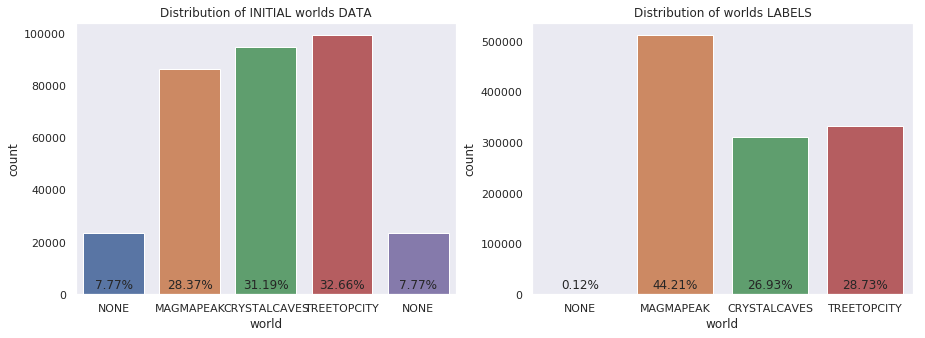

ValueError: Could not interpret input 'accuracy_group'

In [32]:
order = labels.world.unique()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.countplot(x='world', data=df_group , order=np.append(order, 'NONE'))
ax.set_title('Distribution of INITIAL worlds DATA')
autolabel(df_group.world.value_counts()/df_group.shape[0]*100, ax)

plt.subplot(1,2,2)
ax = sns.countplot(x='world', data=labels, order=order);
ax.set_title('Distribution of worlds LABELS');
autolabel(labels.world.value_counts()/labels.shape[0]*100, ax)

plt.show()

ax = sns.countplot(x='world', data=labels, hue='accuracy_group', order=order);
ax.set_title('Distribution of worlds LABELS');

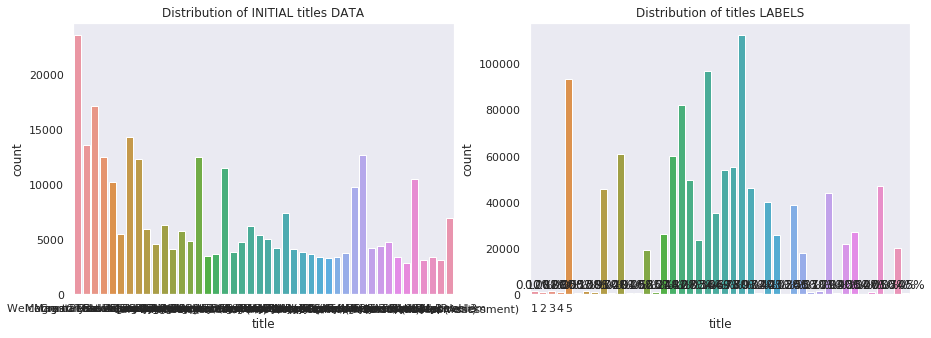

ValueError: Could not interpret input 'accuracy_group'

In [33]:
order = labels.title.unique()
leaved_cat = np.isin(df_group.title.unique(), order)
leaved_cat = df_group.title.unique()[~leaved_cat]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.countplot(x='title', data=df_group , order=np.append(order, leaved_cat))
ax.set_title('Distribution of INITIAL titles DATA')
#autolabel(df.title.value_counts()/df.shape[0]*100, ax)

plt.subplot(1,2,2)
ax = sns.countplot(x='title', data=labels, order=order);
ax.set_title('Distribution of titles LABELS');
autolabel(labels.title.value_counts()/labels.shape[0]*100, ax)
ax.set_xticklabels(['1','2','3','4','5'])

plt.show()

ax = sns.countplot(x='title', data=labels, hue='accuracy_group', order=order);
ax.set_title('Distribution of titels LABELS');
ax.set_xticklabels(['1','2','3','4','5']);
print(order)

**Note:** One can see for title 2 = 'Chest Sorter (Assessment)' most of samples have *accuracy_group* = 0 despire *accuracy_group* = 3 is majority class.

In [34]:
title_unique = labels.title.unique()

# counters for each title_name
counter_title = {'title': [lambda x,y=t: np.sum(x==y) for t in title_unique]}
# last title name
counter_title['title'].append(lambda x: x.iloc[-1])

counter_title.update({'game_session':'count',
                      'timestamp': lambda x: x.iloc[-1]})
counter_title

{'title': [<function __main__.<listcomp>.<lambda>(x, y='Welcome to Lost Lagoon!')>,
  <function __main__.<listcomp>.<lambda>(x, y='Magma Peak - Level 1')>,
  <function __main__.<listcomp>.<lambda>(x, y='Magma Peak - Level 2')>,
  <function __main__.<listcomp>.<lambda>(x, y='Crystal Caves - Level 1')>,
  <function __main__.<listcomp>.<lambda>(x, y='Chow Time')>,
  <function __main__.<listcomp>.<lambda>(x, y='Balancing Act')>,
  <function __main__.<listcomp>.<lambda>(x, y='Crystal Caves - Level 2')>,
  <function __main__.<listcomp>.<lambda>(x, y='Tree Top City - Level 1')>,
  <function __main__.<listcomp>.<lambda>(x, y='All Star Sorting')>,
  <function __main__.<listcomp>.<lambda>(x, y='Costume Box')>,
  <function __main__.<listcomp>.<lambda>(x, y='Fireworks (Activity)')>,
  <function __main__.<listcomp>.<lambda>(x, y='12 Monkeys')>,
  <function __main__.<listcomp>.<lambda>(x, y='Lifting Heavy Things')>,
  <function __main__.<listcomp>.<lambda>(x, y='Cart Balancer (Assessment)')>,
  <fun

In [35]:
columns = ['installation_id', 'title_MS', 'title_CS', 'title_BM', 'title_CB', 'title_CF', 'title_last',
       'n_games', 'timestamp_last']
labels_title = labels.sort_values(by='timestamp').groupby('installation_id', as_index=False)\
                     .agg(counter_title)
labels_title.columns = columns

labels_title.head()

ValueError: Length mismatch: Expected axis has 48 elements, new values have 9 elements

# Look closer on one user

In [36]:
user_id = df_counter.installation_id.value_counts().idxmax()
user_id

'08987c08'

In [37]:
# check that user exists in labels
labels[labels.installation_id == user_id].shape[0] != 0

False

In [38]:
# find all information for user
user = df[df.installation_id == user_id]
user = user.sort_values(by='timestamp')
user.head(), user.shape

(        event_id      game_session                 timestamp  \
 409058  27253bdc  5bc756debd97a313  2019-08-05T16:11:03.928Z   
 409059  27253bdc  534ed88b7459e313  2019-08-05T16:12:29.447Z   
 409060  27253bdc  bb1842c07b8e72da  2019-08-05T16:13:59.361Z   
 409061  27253bdc  65fd8a3d84e9b26a  2019-08-05T16:15:45.628Z   
 409062  27253bdc  e612b7bb56139114  2019-08-05T16:17:27.377Z   
 
                                     event_data installation_id  event_count  \
 409058  {"event_code": 2000, "event_count": 1}        08987c08            1   
 409059  {"event_code": 2000, "event_count": 1}        08987c08            1   
 409060  {"event_code": 2000, "event_count": 1}        08987c08            1   
 409061  {"event_code": 2000, "event_count": 1}        08987c08            1   
 409062  {"event_code": 2000, "event_count": 1}        08987c08            1   
 
         event_code  game_time                    title  type world  
 409058        2000          0  Welcome to Lost Lagoon! 

In [39]:
user['timestamp'] = pd.to_datetime(user['timestamp'])
user.dtypes

event_id                        object
game_session                    object
timestamp          datetime64[ns, UTC]
event_data                      object
installation_id                 object
event_count                      int16
event_code                       int16
game_time                        int32
title                           object
type                            object
world                           object
dtype: object

In [40]:
last_attempt = df_counter[df_counter.installation_id == user_id].iloc[-1]
print(last_attempt.timestamp)

user = user[user.timestamp <= last_attempt.timestamp]
print(user.shape)

2019-09-29 02:33:50.007000+00:00
(11169, 11)


In [41]:
user

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
409058,27253bdc,5bc756debd97a313,2019-08-05 16:11:03.928000+00:00,"{""event_code"": 2000, ""event_count"": 1}",08987c08,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
409059,27253bdc,534ed88b7459e313,2019-08-05 16:12:29.447000+00:00,"{""event_code"": 2000, ""event_count"": 1}",08987c08,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
409060,27253bdc,bb1842c07b8e72da,2019-08-05 16:13:59.361000+00:00,"{""event_code"": 2000, ""event_count"": 1}",08987c08,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
409061,27253bdc,65fd8a3d84e9b26a,2019-08-05 16:15:45.628000+00:00,"{""event_code"": 2000, ""event_count"": 1}",08987c08,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
409062,27253bdc,e612b7bb56139114,2019-08-05 16:17:27.377000+00:00,"{""event_code"": 2000, ""event_count"": 1}",08987c08,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
...,...,...,...,...,...,...,...,...,...,...,...
420222,a8efe47b,f32d7e7f77862955,2019-09-29 02:33:46.505000+00:00,"{""weight"":1,""pillars"":[2],""coordinates"":{""x"":8...",08987c08,19,4030,13466,Chest Sorter (Assessment),Assessment,CRYSTALCAVES
420223,0db6d71d,f32d7e7f77862955,2019-09-29 02:33:47.640000+00:00,"{""weight"":1,""destination"":""Lightest"",""coordina...",08987c08,20,4020,14617,Chest Sorter (Assessment),Assessment,CRYSTALCAVES
420224,a8efe47b,f32d7e7f77862955,2019-09-29 02:33:48.424000+00:00,"{""weight"":3,""pillars"":[1,2],""coordinates"":{""x""...",08987c08,21,4030,15383,Chest Sorter (Assessment),Assessment,CRYSTALCAVES
420225,0db6d71d,f32d7e7f77862955,2019-09-29 02:33:48.757000+00:00,"{""weight"":3,""destination"":""Heavy"",""coordinates...",08987c08,22,4020,15733,Chest Sorter (Assessment),Assessment,CRYSTALCAVES
